In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import numpy as np

In [3]:
baseDeDonnees = pd.read_csv("Donnés\BaseDeDonneesPlusComplete1970-2025.csv", index_col = "date")
baseDeDonnees

C:\Users\test8\AppData\Local\Temp\ipykernel_22372\4192361592.py:1: DtypeWarning: Columns (46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  baseDeDonnees = pd.read_csv("Donnés\BaseDeDonneesPlusComplete1970-2025.csv", index_col = "date")


,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_humidex,min_windchill,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,...,avg_cloud_cover_4,min_cloud_cover_4,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10
date,,,,,,,,,,,,,,,,,,,,,
2025-05-14,27.4,21.08,19.85,12.3,30.0,NaN,81,56.8,60.0,39,...,NaN,NaN,7.0,2.9,3.5,0.0,NaN,NaN,NaN,NaN
2025-05-13,26.8,19.01,18.00,9.2,27.0,NaN,73,45.6,50.5,28,...,NaN,NaN,7.0,4.5,4.0,1.0,NaN,NaN,NaN,NaN
2025-05-12,21.3,15.28,15.60,9.9,NaN,NaN,55,42.0,42.0,29,...,NaN,NaN,8.0,7.1,5.5,3.0,NaN,NaN,NaN,NaN
2025-05-11,17.1,10.47,10.40,3.7,NaN,NaN,65,40.9,42.0,19,...,NaN,NaN,8.0,1.6,4.0,0.0,NaN,NaN,NaN,NaN
2025-05-10,18.9,11.88,13.00,7.1,NaN,NaN,96,77.2,70.0,44,...,NaN,NaN,8.0,7.2,5.5,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-05-18,17.2,12.41,11.95,6.7,NaN,NaN,89,62.5,66.0,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-05-17,15.0,12.82,11.95,8.9,NaN,NaN,96,81.9,80.5,65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-05-16,18.3,14.22,14.45,10.6,NaN,NaN,80,65.6,68.0,56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
baseDeDonnees.apply(pd.isnull).sum()/baseDeDonnees.shape[0]

max_temperature              0.000000
avg_hourly_temperature       0.000000
avg_temperature              0.000000
min_temperature              0.000000
max_humidex                  0.746541
                               ...   
min_cloud_cover_8            0.789149
max_cloud_cover_10           0.994126
avg_hourly_cloud_cover_10    0.994126
avg_cloud_cover_10           0.994126
min_cloud_cover_10           0.994126
Length: 71, dtype: float64

In [4]:
baseDeDonneesNettoyee = baseDeDonnees[["precipitation","snow","rain","max_temperature","min_temperature"]].copy()
baseDeDonneesNettoyee.columns = ["precip","snow","rain","temp_max","temp_min"]
baseDeDonneesNettoyee

,precip,snow,rain,temp_max,temp_min
date,,,,,
2025-05-14,0.0,0.0,0.0,27.4,12.3
2025-05-13,0.0,0.0,0.0,26.8,9.2
2025-05-12,0.0,0.0,0.0,21.3,9.9
2025-05-11,0.0,0.0,0.0,17.1,3.7
2025-05-10,14.2,0.0,14.2,18.9,7.1
...,...,...,...,...,...
1970-05-18,0.0,0.0,0.0,17.2,6.7
1970-05-17,8.9,0.0,8.9,15.0,8.9
1970-05-16,1.5,0.0,1.5,18.3,10.6


In [5]:
null_prc = baseDeDonneesNettoyee.apply(pd.isnull).sum()/baseDeDonneesNettoyee.shape[0]
null_prc

precip      0.001244
snow        0.003733
rain        0.004380
temp_max    0.000000
temp_min    0.000000
dtype: float64

In [6]:
#Remplissage des trous de donnés
baseDeDonneesNettoyee["snow"] = baseDeDonneesNettoyee["snow"].fillna(0)
baseDeDonneesNettoyee = baseDeDonneesNettoyee.ffill()
baseDeDonneesNettoyee.apply(pd.isnull).sum()/baseDeDonneesNettoyee.shape[0]
baseDeDonneesNettoyee


,precip,snow,rain,temp_max,temp_min
date,,,,,
2025-05-14,0.0,0.0,0.0,27.4,12.3
2025-05-13,0.0,0.0,0.0,26.8,9.2
2025-05-12,0.0,0.0,0.0,21.3,9.9
2025-05-11,0.0,0.0,0.0,17.1,3.7
2025-05-10,14.2,0.0,14.2,18.9,7.1
...,...,...,...,...,...
1970-05-18,0.0,0.0,0.0,17.2,6.7
1970-05-17,8.9,0.0,8.9,15.0,8.9
1970-05-16,1.5,0.0,1.5,18.3,10.6


In [7]:
baseDeDonneesNettoyee.index = pd.to_datetime(baseDeDonneesNettoyee.index)
baseDeDonneesNettoyee.index


DatetimeIndex(['2025-05-14', '2025-05-13', '2025-05-12', '2025-05-11',
               '2025-05-10', '2025-05-09', '2025-05-08', '2025-05-07',
               '2025-05-06', '2025-05-05',
               ...
               '1970-05-23', '1970-05-22', '1970-05-21', '1970-05-20',
               '1970-05-19', '1970-05-18', '1970-05-17', '1970-05-16',
               '1970-05-15', '1970-05-14'],
              dtype='datetime64[ns]', name='date', length=20090, freq=None)

In [8]:
#Verification probleme data
baseDeDonneesNettoyee.apply(lambda x: (x==9999).sum())

precip      0
snow        0
rain        0
temp_max    0
temp_min    0
dtype: int64

<Axes: xlabel='date'>

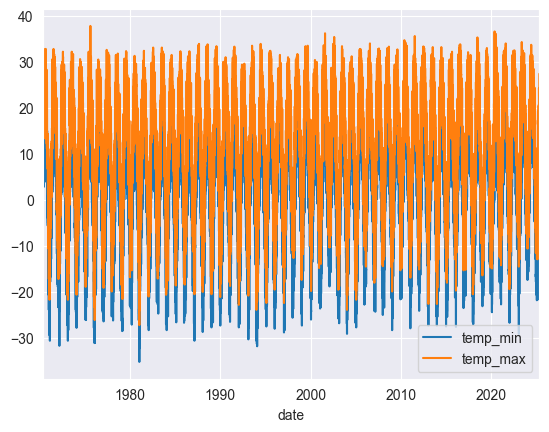

In [9]:
#Analyse pour savoir s'il y a un manque de data.
baseDeDonneesNettoyee[["temp_min","temp_max"]].plot()

In [10]:
#Choisir ce que je veux predire.
colonnes_a_predire = ["precip","snow","rain","temp_max","temp_min"]
for col in colonnes_a_predire:
    baseDeDonneesNettoyee[f"target_{col}"] = baseDeDonneesNettoyee.shift(-1)[col]

baseDeDonneesNettoyee = baseDeDonneesNettoyee.ffill()
#Permet de mettre les dates en ordres.
baseDeDonneesNettoyee = baseDeDonneesNettoyee[::-1]
#Creation de mon model de Ml
reg = Ridge(alpha = .1)
predicteur = ["precip","snow","rain","temp_max","temp_min"]
train = baseDeDonneesNettoyee.loc[:"2023-12-31"]
test = baseDeDonneesNettoyee.loc["2024-01-01":]
reg.fit(train[predicteur],train["target_temp_max"])
reg.fit(train[predicteur],train["target_temp_min"])
predictions = reg.predict(test[predicteur])
baseDeDonneesNettoyee


,precip,snow,rain,temp_max,temp_min,target_precip,target_snow,target_rain,target_temp_max,target_temp_min
date,,,,,,,,,,
1970-05-14,0.0,0.0,0.0,18.9,4.4,0.0,0.0,0.0,18.9,4.4
1970-05-15,0.0,0.0,0.0,17.8,5.6,0.0,0.0,0.0,18.9,4.4
1970-05-16,1.5,0.0,1.5,18.3,10.6,0.0,0.0,0.0,17.8,5.6
1970-05-17,8.9,0.0,8.9,15.0,8.9,1.5,0.0,1.5,18.3,10.6
1970-05-18,0.0,0.0,0.0,17.2,6.7,8.9,0.0,8.9,15.0,8.9
...,...,...,...,...,...,...,...,...,...,...
2025-05-10,14.2,0.0,14.2,18.9,7.1,9.8,0.0,9.8,8.4,5.5
2025-05-11,0.0,0.0,0.0,17.1,3.7,14.2,0.0,14.2,18.9,7.1
2025-05-12,0.0,0.0,0.0,21.3,9.9,0.0,0.0,0.0,17.1,3.7


<Axes: xlabel='date'>

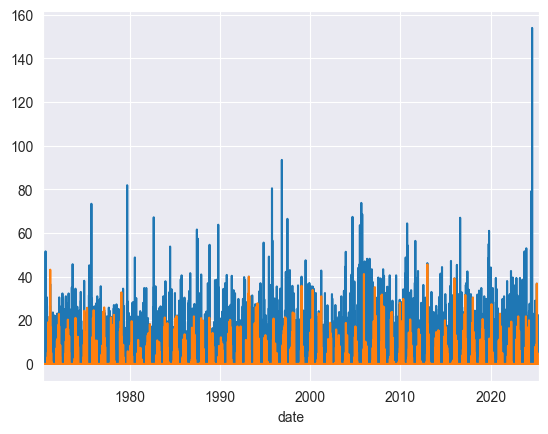

In [11]:
baseDeDonneesNettoyee.index.year.value_counts().sort_index()
baseDeDonneesNettoyee["precip"].plot()
baseDeDonneesNettoyee["snow"].plot()

In [12]:
 #Voir l'erreur de prediction dans le target en question
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test["target_temp_max"],predictions)

mean_absolute_error(test["target_temp_min"],predictions)



2.8486044358477884

,Bonne valeur,Valeur predite
date,,
2024-01-01,-4.2,-7.613842
2024-01-02,-4.5,-4.944502
2024-01-03,0.9,-1.209305
2024-01-04,1.9,-9.668546
2024-01-05,1.6,-11.165526
...,...,...
2025-05-10,8.4,6.946977
2025-05-11,18.9,4.428391
2025-05-12,17.1,9.849329


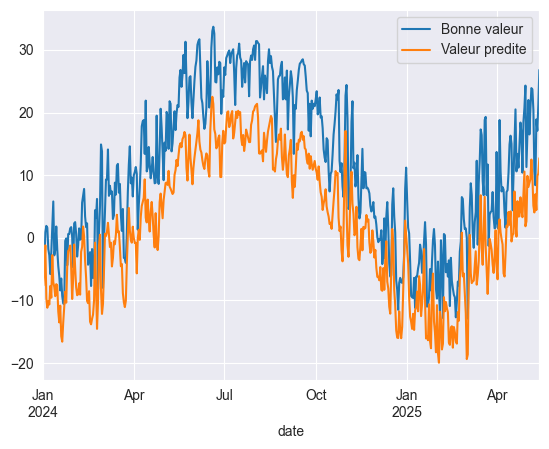

In [13]:
combined = pd.concat([test["target_temp_max"], pd.Series(predictions, index = test.index)],axis=1)
combined.columns=["Bonne valeur","Valeur predite"]
combined.plot()
reg.coef_
combined

In [14]:
#Ajout colonne comparaison temperature max par mois par rapport a la temperature du jour
baseDeDonneesNettoyee["mois_temp_max"] = baseDeDonneesNettoyee["temp_max"].rolling(30).mean()
baseDeDonneesNettoyee["ratio_mois_jour_tempmax"] = baseDeDonneesNettoyee["mois_temp_max"] / baseDeDonneesNettoyee["temp_max"]
baseDeDonneesNettoyee["ratio_max_min"] = baseDeDonneesNettoyee["temp_max"] / baseDeDonneesNettoyee["temp_min"]
baseDeDonneesNettoyee

,precip,snow,rain,temp_max,temp_min,target_precip,target_snow,target_rain,target_temp_max,target_temp_min,mois_temp_max,ratio_mois_jour_tempmax,ratio_max_min
date,,,,,,,,,,,,,
1970-05-14,0.0,0.0,0.0,18.9,4.4,0.0,0.0,0.0,18.9,4.4,NaN,NaN,4.295455
1970-05-15,0.0,0.0,0.0,17.8,5.6,0.0,0.0,0.0,18.9,4.4,NaN,NaN,3.178571
1970-05-16,1.5,0.0,1.5,18.3,10.6,0.0,0.0,0.0,17.8,5.6,NaN,NaN,1.726415
1970-05-17,8.9,0.0,8.9,15.0,8.9,1.5,0.0,1.5,18.3,10.6,NaN,NaN,1.685393
1970-05-18,0.0,0.0,0.0,17.2,6.7,8.9,0.0,8.9,15.0,8.9,NaN,NaN,2.567164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-10,14.2,0.0,14.2,18.9,7.1,9.8,0.0,9.8,8.4,5.5,15.536667,0.822046,2.661972
2025-05-11,0.0,0.0,0.0,17.1,3.7,14.2,0.0,14.2,18.9,7.1,15.853333,0.927096,4.621622
2025-05-12,0.0,0.0,0.0,21.3,9.9,0.0,0.0,0.0,17.1,3.7,16.216667,0.761346,2.151515


In [15]:
#Creer methode de prediction
def predire_et_ajouter_nouvelle_ligne(base, predicteurs, alpha=0.1, date_split="2023-12-31"):
    cibles = [col for col in base.columns if col.startswith("target_")]
    derniere_date = base.index[-1]
    date_demain = derniere_date + pd.Timedelta(days=1)

    # Préparer les données de prédiction
    donnees = base.iloc[-1][predicteurs].values.reshape(1, -1)
    nouvelle_ligne = pd.Series(index=base.columns, name=date_demain)

    # Copier les valeurs des prédicteurs
    for col in predicteurs:
        nouvelle_ligne[col] = base.iloc[-1][col]

    # Pour chaque cible, entraîner un modèle et faire la prédiction
    for cible in cibles:
        modele = Ridge(alpha=alpha)
        train = base.loc[:date_split]
        modele.fit(train[predicteurs], train[cible])
        prediction = modele.predict(donnees)[0]

        col_var = cible.replace("target_", "")
        nouvelle_ligne[col_var] = prediction
        nouvelle_ligne[cible] = base.iloc[-1][col_var]

    base = pd.concat([base, pd.DataFrame([nouvelle_ligne])])
    return base

In [16]:
#Voir la moyenne de temperature par mois
baseDeDonneesNettoyee["mois_temp_max"] = baseDeDonneesNettoyee["temp_max"].rolling(30).mean()

In [17]:
baseDeDonneesNettoyee

,precip,snow,rain,temp_max,temp_min,target_precip,target_snow,target_rain,target_temp_max,target_temp_min,mois_temp_max,ratio_mois_jour_tempmax,ratio_max_min
date,,,,,,,,,,,,,
1970-05-14,0.0,0.0,0.0,18.9,4.4,0.0,0.0,0.0,18.9,4.4,NaN,NaN,4.295455
1970-05-15,0.0,0.0,0.0,17.8,5.6,0.0,0.0,0.0,18.9,4.4,NaN,NaN,3.178571
1970-05-16,1.5,0.0,1.5,18.3,10.6,0.0,0.0,0.0,17.8,5.6,NaN,NaN,1.726415
1970-05-17,8.9,0.0,8.9,15.0,8.9,1.5,0.0,1.5,18.3,10.6,NaN,NaN,1.685393
1970-05-18,0.0,0.0,0.0,17.2,6.7,8.9,0.0,8.9,15.0,8.9,NaN,NaN,2.567164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-10,14.2,0.0,14.2,18.9,7.1,9.8,0.0,9.8,8.4,5.5,15.536667,0.822046,2.661972
2025-05-11,0.0,0.0,0.0,17.1,3.7,14.2,0.0,14.2,18.9,7.1,15.853333,0.927096,4.621622
2025-05-12,0.0,0.0,0.0,21.3,9.9,0.0,0.0,0.0,17.1,3.7,16.216667,0.761346,2.151515


In [18]:
predicteur = ["precip","snow","temp_max","temp_min","mois_temp_max","ratio_mois_jour_tempmax","ratio_max_min"]

In [19]:
#Enlever les valeurs NaN causer parce nous n'avons pas les valeurs des 30 jours avant pour pouvoir calculer la moyenne de temp_max pour la colonne mois_temp_max.
baseDeDonneesNettoyee = baseDeDonneesNettoyee.iloc[30:,:].copy()
baseDeDonneesNettoyee
#Transforme nos valeur inf et -inf par NaN pour pouvoir les gerer.
baseDeDonneesNettoyee.replace([np.inf, -np.inf], np.nan, inplace=True)
#Remplacer nos valeur NaN par 0 pour ne pas avoir de manque de donnes.
baseDeDonneesNettoyee = baseDeDonneesNettoyee.fillna(0)


In [20]:
for i in range(7):
    baseDeDonneesNettoyee = predire_et_ajouter_nouvelle_ligne(baseDeDonneesNettoyee,predicteur)

baseDeDonneesNettoyee

C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid fe

,precip,snow,rain,temp_max,temp_min,target_precip,target_snow,target_rain,target_temp_max,target_temp_min,mois_temp_max,ratio_mois_jour_tempmax,ratio_max_min
1970-06-13,0.000000,0.000000,0.000000,18.900000,8.300000,0.000000,0.000000,0.000000,23.900000,10.000000,21.560000,1.140741,2.277108
1970-06-14,0.000000,0.000000,0.000000,24.400000,7.200000,0.000000,0.000000,0.000000,18.900000,8.300000,21.780000,0.892623,3.388889
1970-06-15,0.000000,0.000000,0.000000,27.200000,10.600000,0.000000,0.000000,0.000000,24.400000,7.200000,22.076667,0.811642,2.566038
1970-06-16,0.000000,0.000000,0.000000,24.400000,15.600000,0.000000,0.000000,0.000000,27.200000,10.600000,22.390000,0.917623,1.564103
1970-06-17,0.000000,0.000000,0.000000,27.200000,14.400000,0.000000,0.000000,0.000000,24.400000,15.600000,22.723333,0.835417,1.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-17,2.586702,0.122266,2.437188,19.477037,9.221007,2.224986,0.034321,2.164592,20.715934,10.037891,16.983333,0.619830,2.227642
2025-05-18,2.726562,0.173668,2.527573,18.694016,8.618717,2.586702,0.122266,2.437188,19.477037,9.221007,16.983333,0.619830,2.227642
2025-05-19,2.788899,0.206352,2.559485,18.169716,8.186158,2.726562,0.173668,2.527573,18.694016,8.618717,16.983333,0.619830,2.227642
2025-05-20,2.821719,0.228283,2.572244,17.808684,7.878909,2.788899,0.206352,2.559485,18.169716,8.186158,16.983333,0.619830,2.227642


In [21]:
reg.coef_

array([ 0.0196364 , -0.19808464, -0.04554873,  0.17135791,  0.75826377])

In [22]:
combined["diff"] = (combined["Bonne valeur"] - combined["Valeur predite"]).abs()
combined

,Bonne valeur,Valeur predite,diff
date,,,
2024-01-01,-4.2,-7.613842,3.413842
2024-01-02,-4.5,-4.944502,0.444502
2024-01-03,0.9,-1.209305,2.109305
2024-01-04,1.9,-9.668546,11.568546
2024-01-05,1.6,-11.165526,12.765526
...,...,...,...
2025-05-10,8.4,6.946977,1.453023
2025-05-11,18.9,4.428391,14.471609
2025-05-12,17.1,9.849329,7.250671


In [23]:
combined.sort_values("diff",ascending=False).head()
baseDeDonneesNettoyee

,precip,snow,rain,temp_max,temp_min,target_precip,target_snow,target_rain,target_temp_max,target_temp_min,mois_temp_max,ratio_mois_jour_tempmax,ratio_max_min
1970-06-13,0.000000,0.000000,0.000000,18.900000,8.300000,0.000000,0.000000,0.000000,23.900000,10.000000,21.560000,1.140741,2.277108
1970-06-14,0.000000,0.000000,0.000000,24.400000,7.200000,0.000000,0.000000,0.000000,18.900000,8.300000,21.780000,0.892623,3.388889
1970-06-15,0.000000,0.000000,0.000000,27.200000,10.600000,0.000000,0.000000,0.000000,24.400000,7.200000,22.076667,0.811642,2.566038
1970-06-16,0.000000,0.000000,0.000000,24.400000,15.600000,0.000000,0.000000,0.000000,27.200000,10.600000,22.390000,0.917623,1.564103
1970-06-17,0.000000,0.000000,0.000000,27.200000,14.400000,0.000000,0.000000,0.000000,24.400000,15.600000,22.723333,0.835417,1.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-17,2.586702,0.122266,2.437188,19.477037,9.221007,2.224986,0.034321,2.164592,20.715934,10.037891,16.983333,0.619830,2.227642
2025-05-18,2.726562,0.173668,2.527573,18.694016,8.618717,2.586702,0.122266,2.437188,19.477037,9.221007,16.983333,0.619830,2.227642
2025-05-19,2.788899,0.206352,2.559485,18.169716,8.186158,2.726562,0.173668,2.527573,18.694016,8.618717,16.983333,0.619830,2.227642
2025-05-20,2.821719,0.228283,2.572244,17.808684,7.878909,2.788899,0.206352,2.559485,18.169716,8.186158,16.983333,0.619830,2.227642


In [24]:
baseDeDonneesNettoyee.tail(10)

,precip,snow,rain,temp_max,temp_min,target_precip,target_snow,target_rain,target_temp_max,target_temp_min,mois_temp_max,ratio_mois_jour_tempmax,ratio_max_min
2025-05-12,0.000000,0.000000,0.000000,21.300000,9.900000,0.000000,0.000000,0.000000,17.100000,3.700000,16.216667,0.761346,2.151515
2025-05-13,0.000000,0.000000,0.000000,26.800000,9.200000,0.000000,0.000000,0.000000,21.300000,9.900000,16.613333,0.619900,2.913043
2025-05-14,0.000000,0.000000,0.000000,27.400000,12.300000,0.000000,0.000000,0.000000,26.800000,9.200000,16.983333,0.619830,2.227642
2025-05-15,1.267712,-0.115300,1.366535,22.894719,11.080006,0.000000,0.000000,0.000000,27.400000,12.300000,16.983333,0.619830,2.227642
2025-05-16,2.224986,0.034321,2.164592,20.715934,10.037891,1.267712,-0.115300,1.366535,22.894719,11.080006,16.983333,0.619830,2.227642
2025-05-17,2.586702,0.122266,2.437188,19.477037,9.221007,2.224986,0.034321,2.164592,20.715934,10.037891,16.983333,0.619830,2.227642
2025-05-18,2.726562,0.173668,2.527573,18.694016,8.618717,2.586702,0.122266,2.437188,19.477037,9.221007,16.983333,0.619830,2.227642
2025-05-19,2.788899,0.206352,2.559485,18.169716,8.186158,2.726562,0.173668,2.527573,18.694016,8.618717,16.983333,0.619830,2.227642
2025-05-20,2.821719,0.228283,2.572244,17.808684,7.878909,2.788899,0.206352,2.559485,18.169716,8.186158,16.983333,0.619830,2.227642
2025-05-21,2.841455,0.243399,2.578268,17.556883,7.661693,2.821719,0.228283,2.572244,17.808684,7.878909,16.983333,0.619830,2.227642
